In [1]:
import json
import matplotlib.pyplot as plt
from src.agent import Agent, AgentState, TASK_DICO
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
META = "llama3.2:3b"
MODEL_NAME = META

In [3]:
with open("data/test_data.json", "r") as f:
    test_cases = json.load(f)
expected_task = []
predict_task = []
agent = Agent(MODEL_NAME)
for i, test_case in enumerate(test_cases):
    question = test_case["input"]
    expected = test_case["expected_task"].strip()
    state = AgentState(input=question)
    result = agent.run(state)
    tasks = result["tools_to_call"]
    if len(tasks)>1:
        print(tasks, question, sep=" ")
    expected_task.append(expected)
    predict_task.append(tasks[-1]['name'])
print(f'Taux de bonne prédiction de tache {100 * accuracy_score(y_true=expected_task, y_pred=predict_task)}%')

DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='/opt/homebrew/Caskroom/mambaforge/base/envs/txt_ml_env/lib/python3.9/site-packages/certifi/cacert.pem'
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='/opt/homebrew/Caskroom/mambaforge/base/envs/txt_ml_env/lib/python3.9/site-packages/certifi/cacert.pem'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mermaid.ink:443
DEBUG:urllib3.connectionpool:https://mermaid.ink:443 "GET /img/LS0tCmNvbmZpZzoKICBmbG93Y2hhcnQ6CiAgICBjdXJ2ZTogbGluZWFyCi0tLQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCWRlY2lzaW9uX25vZGUoZGVjaXNpb25fbm9kZSkKCXRvb2xfbm9kZSh0b29sX25vZGUpCglyZXN1bHRfbm9kZShyZXN1bHRfbm9kZSkKCV9fZW5kX18oWzxwPl9fZW5kX188L3A+XSk6OjpsYXN0CglfX3N0YXJ0X18gLS0+IGRlY2lzaW9uX25vZGU7CglkZWNpc2lvbl9ub2RlIC0uLT4gX19lbmRfXzsKCWRlY2lzaW9uX25vZGUgLS4tPiB0b29sX25vZGU7CglyZXN1bHRfbm9

Taux de bonne prédiction de tache 100.0%


In [4]:
print(classification_report(expected_task, predict_task, digits=2))

                    precision    recall  f1-score   support

  emotion_analysis       1.00      1.00      1.00        10
      ner_analysis       1.00      1.00      1.00        15
sentiment_analysis       1.00      1.00      1.00        10

          accuracy                           1.00        35
         macro avg       1.00      1.00      1.00        35
      weighted avg       1.00      1.00      1.00        35



DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/opt/homebrew/Caskroom/mambaforge/base/envs/txt_ml_env/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/opt/homebrew/Caskroom/mambaforge/base/envs/txt_ml_env/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/opt/homebrew/Caskroom/mam

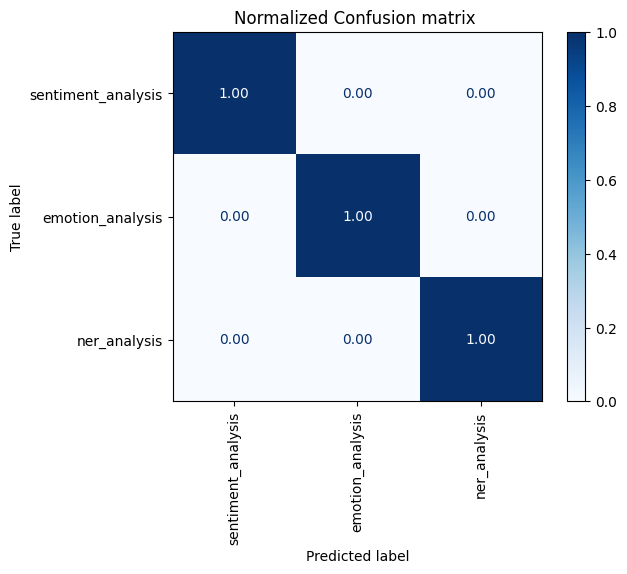

In [5]:
clf_classes = [key for key in TASK_DICO.keys()]
conf_mat_norm = confusion_matrix(expected_task, predict_task, normalize='true', labels=clf_classes)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm, display_labels=clf_classes)
disp_norm.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion matrix ")
plt.grid(False)
plt.xticks(rotation=90)
plt.show()